In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('training_data.csv')

Let's print the autocorrelation for the time series lags:

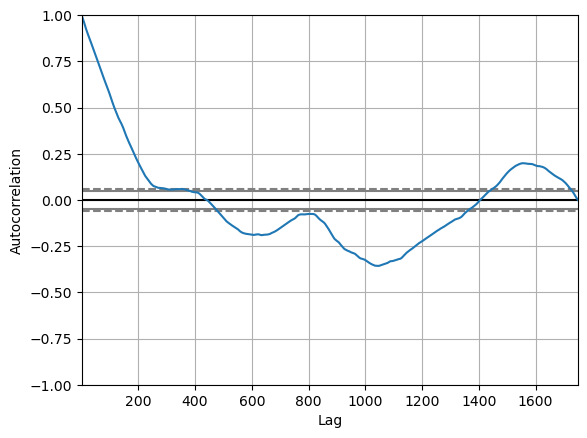

In [3]:
autocorrelation_plot(df['Close'])
plt.show()

We can see there is a positive correlation with the first 100 lags that is about 14 days (or 3 weeks). It may be benefitial to train with daily data or even weekly data to minimise the training cost. Depending on the period of prediction we are going to make, we initiate the model with the most significant lags.

In [4]:
# Split the data into training and test sets
train, test = train_test_split(df, train_size=0.9)

In [5]:
# Fit auto_arima
model = pm.auto_arima(train['Close'], max_p=14, max_d=2, max_q=5, trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-8647.689, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-9067.737, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-9259.311, Time=0.40 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-9377.815, Time=0.40 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=-9432.997, Time=0.17 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-9470.851, Time=0.35 sec
 ARIMA(6,2,0)(0,0,0)[0]             : AIC=-9530.726, Time=0.32 sec
 ARIMA(7,2,0)(0,0,0)[0]             : AIC=-9549.204, Time=0.29 sec
 ARIMA(8,2,0)(0,0,0)[0]             : AIC=-9557.269, Time=0.56 sec
 ARIMA(9,2,0)(0,0,0)[0]             : AIC=-9557.052, Time=0.60 sec
 ARIMA(8,2,1)(0,0,0)[0]             : AIC=-9579.153, Time=2.48 sec
 ARIMA(7,2,1)(0,0,0)[0]             : AIC=-9581.520, Time=1.97 sec
 ARIMA(6,2,1)(0,0,0)[0]        

We make the prediction and calculate the Root Mean Square Error:

In [6]:
# Make predictions
forecast, conf_int = model.predict(n_periods=len(test['Close']), return_conf_int=True)

for idx in forecast.index:
    yhat = forecast.loc[idx]
    obs = test['Close'].loc[idx]
    print(f'predicted={yhat}, expected={obs}')

rmse = sqrt(mean_squared_error(test['Close'], forecast))
print('Test RMSE: %.3f' % rmse)

predicted=5.159738787151448, expected=5.132026630430481
predicted=5.161038975211918, expected=5.146097588561642
predicted=5.162180710979125, expected=5.147145592945473
predicted=5.163234593540915, expected=5.145897861018487
predicted=5.164339827264571, expected=5.144174977295135
predicted=5.165474495257608, expected=5.142949286443782
predicted=5.166607256374442, expected=5.143474766490973
predicted=5.16773642098832, expected=5.142365036239715
predicted=5.168866374650438, expected=5.151266388484042
predicted=5.169997658705772, expected=5.14700012956336
predicted=5.171129176928211, expected=5.15300251773786
predicted=5.172260588364419, expected=5.158307865456576
predicted=5.173391996997306, expected=5.166955076192539
predicted=5.174523453038613, expected=5.16894870189411
predicted=5.175654928858956, expected=5.165088749650398
predicted=5.1767864044346545, expected=5.165243022781083
predicted=5.177917879335361, expected=5.160548405280335
predicted=5.179049355718607, expected=5.15542519441

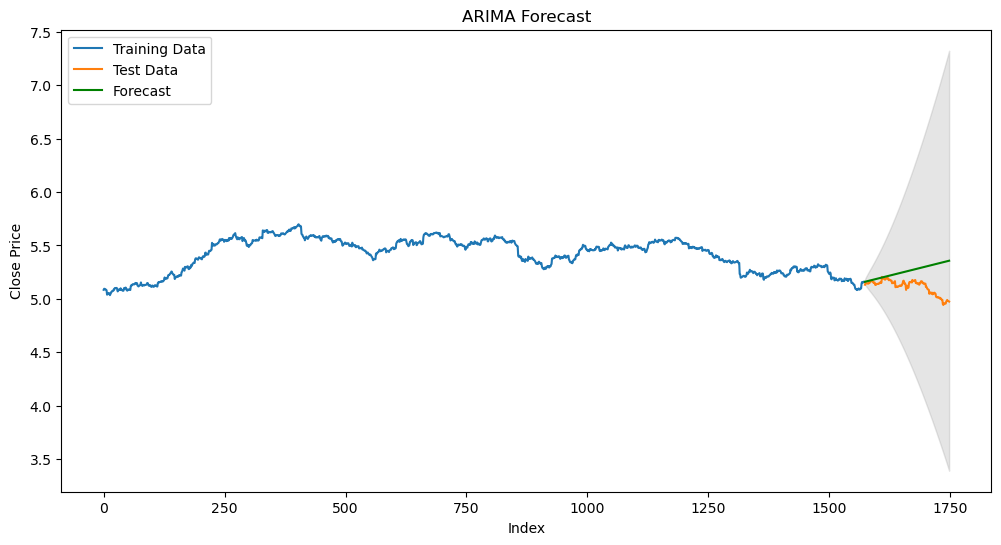

In [7]:
# Plot the results
x_axis = np.arange(train.shape[0] + test.shape[0])

plt.figure(figsize=(12, 6))
plt.plot(x_axis[:train.shape[0]], train['Close'], label='Training Data')
plt.plot(x_axis[train.shape[0]:], test['Close'], label='Test Data')
plt.plot(x_axis[train.shape[0]:], forecast, label='Forecast', color='green')
plt.fill_between(x_axis[train.shape[0]:], conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2)
plt.title('ARIMA Forecast')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

From the above graph, we can see the test set falls inside the area of the prediction model with 95% confidence.

In [8]:
model2 = pm.auto_arima(df['Close'], max_p=14, max_d=2, max_q=5, trace=True, error_action='ignore', suppress_warnings=True)
# Make predictions for the next 10 days
forecast_next_10_days, conf_int_next_10_days = model2.predict(n_periods=70, return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.87 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-9557.836, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-10030.700, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-10251.183, Time=0.15 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-10384.155, Time=0.28 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=-10448.750, Time=0.21 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-10483.550, Time=0.37 sec
 ARIMA(6,2,0)(0,0,0)[0]             : AIC=-10554.170, Time=0.45 sec
 ARIMA(7,2,0)(0,0,0)[0]             : AIC=-10573.353, Time=0.56 sec
 ARIMA(8,2,0)(0,0,0)[0]             : AIC=-10583.965, Time=0.57 sec
 ARIMA(9,2,0)(0,0,0)[0]             : AIC=-10583.939, Time=0.31 sec
 ARIMA(8,2,1)(0,0,0)[0]             : AIC=-10608.261, Time=2.77 sec
 ARIMA(7,2,1)(0,0,0)[0]             : AIC=-10611.191, Time=2.05 sec
 ARIMA(6,2,1)(0,0,0)

In [9]:
x_axis = np.arange(df.shape[0] + forecast_next_10_days.shape[0])
x_axis

array([   0,    1,    2, ..., 1816, 1817, 1818])

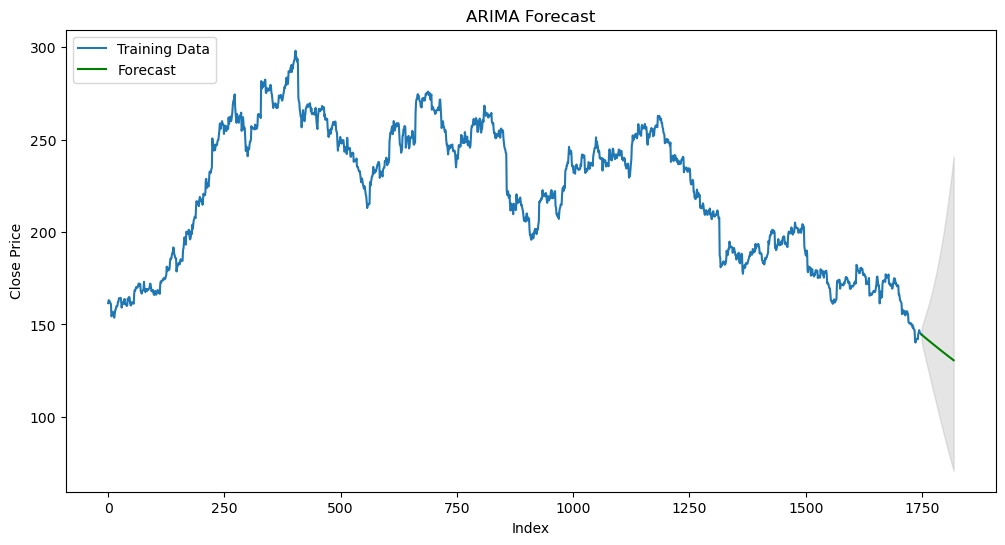

In [10]:
# Plot the results
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x_axis[:df.shape[0]], np.exp(df['Close']), label='Training Data')
plt.plot(x_axis[df.shape[0]:], np.exp(forecast_next_10_days), label='Forecast', color='green')
plt.fill_between(x_axis[df.shape[0]:], np.exp(conf_int_next_10_days[:, 0]), np.exp(conf_int_next_10_days[:, 1]), color='gray', alpha=0.2)
plt.title('ARIMA Forecast')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

Finally, I want to see the range of price of Tesla it may have to see if it worths investing in.

In [11]:
print('lowest' + str(np.exp(conf_int_next_10_days[69:, 0])) + ' highest' + str(np.exp(conf_int_next_10_days[69:, 1])))

lowest[70.82606176] highest[240.82270899]
